In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nptdms import TdmsFile
from pathlib import Path
import os
# importing sys
import sys

from nptdms import TdmsFile

nb_path = Path.cwd()
print(nb_path)

c:\Users\gustav.wiberg\Documents\GitHub\Python\Arenz_Group_Python\tests


In [9]:




class EC_Data:
    def __init__(self, path):
        self._area=1
        self._area_unit="cm^2"
        self.U=[]
        try:
            tdms_file = TdmsFile.read(path)
            tdms_file.close()
            self.path = str(path)
            self.Time = tdms_file['EC']['Time'].data
            self.i = tdms_file['EC']['i'].data
            self.E = tdms_file['EC']['E'].data
            self.name = tdms_file.properties['name']
            try:
                self.U = tdms_file['EC']['U1'].data
            except KeyError:
                pass
        except FileNotFoundError :
            print(f"TDMS file was not found: {path}")
        except KeyError as e: 
            print(f"TDMS error: {e}") 

    def get_channel(self,datachannel):
        match datachannel:
            case "Time":
                return self.Time,"t","s"
            case "E":
                return self.E, "E", "V"
            case "U":
                return self.U,"E", "V"
            case "i":
                return self.i,"i", "A"
            case "j":
                return self.i/self._area, "j", f"A/{self._area_unit}"
            case _:
                raise NameError("The channel name is not supported")
                #return np.array([2]), "No channel", "No channel"


    def plot2(self, x_channel,y_channel):
        xlable ="wrong channel name"
        xunit = "wrong channel name"
        ylable ="wrong channel name"
        yunit = "wrong channel name"
        try:
            xdata,xlable,xunit = self.get_channel(x_channel)
        except NameError as e:
            print(f"xchannel {x_channel} not supported") 
        finally:
            try:
                ydata,ylable,yunit = self.get_channel(y_channel)
            except NameError as e:
                print(f"ychannel {y_channel} not supported") 
        #except :
           
        #finally:
             
            fig = plt.figure()
            plt.suptitle(self.name)
            ax = fig.subplots()
            try:
                ax.plot(xdata,ydata)
            except:
                pass
            ax.set_xlabel(f'{xlable} / {xunit}')
            ax.set_ylabel(f'{ylable} / {yunit}')
            return ax
    
    def plot(self, plotType):
        fig = plt.figure()
        ax = fig.subplots()
        match plotType:
            case "i_v_E":
                ax.plot(self.data('E'),self.i)
                ax.set_xlabel('E / V')
                ax.set_ylabel('i / A')
                return ax
            case "i_v_t":
                ax.plot(self.Time,self.i)
                ax.set_xlabel('Time / s')
                ax.set_ylabel('i / A')
                return ax
            case "E_v_t":
                ax.plot(self.Time,self.E)
                ax.set_xlabel('Time / s')
                ax.set_ylabel('E / V')
                return ax
        




test_file_path = nb_path  / 'data'/ 'Steps_102346.tdms'
print(test_file_path)
print(test_file_path.exists())
#data in the folder, e.g.
test_dataSet = EC_Data(test_file_path)
print("get channel")
print(test_dataSet.get_channel("Time"))

#test_dataSet.plot2("Time","k")
 
#test_dataSet.plot("i_v_t")
        

c:\Users\gustav.wiberg\Documents\GitHub\Python\Arenz_Group_Python\tests\data\Steps_102346.tdms
True
get channel
(array([ 0.     ,  0.09999,  0.19998,  0.29997,  0.39996,  0.49995,
        0.59994,  0.69993,  0.79992,  0.89991,  0.9999 ,  1.09989,
        1.19988,  1.29987,  1.39986,  1.49985,  1.59984,  1.69983,
        1.79982,  1.89981,  1.9998 ,  2.09979,  2.19978,  2.29977,
        2.39976,  2.49975,  2.59974,  2.69973,  2.79972,  2.89971,
        2.9997 ,  3.09969,  3.19968,  3.29967,  3.39966,  3.49965,
        3.59964,  3.69963,  3.79962,  3.89961,  3.9996 ,  4.09959,
        4.19958,  4.29957,  4.39956,  4.49955,  4.59954,  4.69953,
        4.79952,  4.89951,  4.9995 ,  5.09949,  5.19948,  5.29947,
        5.39946,  5.49945,  5.59944,  5.69943,  5.79942,  5.89941,
        5.9994 ,  6.09939,  6.19938,  6.29937,  6.39936,  6.49935,
        6.59934,  6.69933,  6.79932,  6.89931,  6.9993 ,  7.09929,
        7.19928,  7.29927,  7.39926,  7.49925,  7.59924,  7.69923,
        7.79922,

In [ ]:
xa = np.linspace(-2.5, 2.5, 30)
yinterp = np.interp(xvals, x, y)

ychannel i1 not supported


<Axes: xlabel='t / s', ylabel='wrong channel name / wrong channel name'>

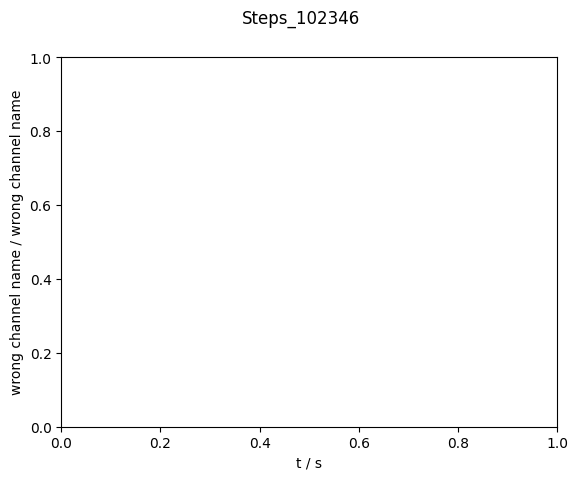

In [4]:
test_dataSet.plot2("Time","i1")

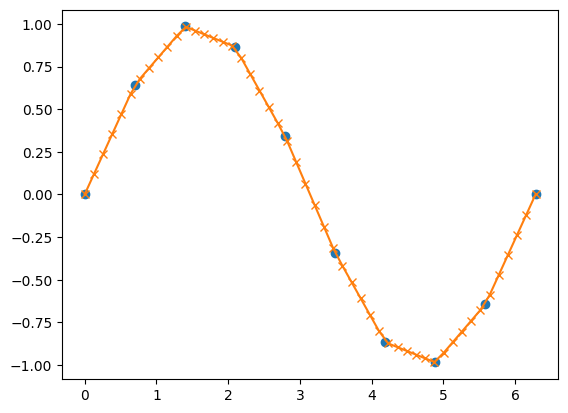

In [8]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')

plt.plot(xvals, yinterp, '-x')

plt.show()

xa = np.linspace(-2.5, 2.5, 30)
yinterp = np.interp(xvals, x, y)

In [20]:
def get_unit_and_exponent(s:str):
    aa = s.split("^",2)
    nyckel = aa[0]
    sign = 1
    fac =  1.0
    if nyckel.startswith("/"):
        nyckel = nyckel[1:]
        sign = -1
    if len(aa)>1:                   #if "^" was found.
        fac = float(aa[1]) 
    return nyckel, sign*fac

    
def quantity_fix(s:str, factor:float = 1):
    list_of_quantities = s.split(" ", 100)
    k={}
    for single_quantity in list_of_quantities:
        nyckel, exponent = get_unit_and_exponent(single_quantity)
        val = float(k.get(nyckel, 0))  
        k[nyckel] = val + exponent
    prep={} 
    for key, value in k.items():
        if int(value*100) != 0:
            prep[key] = value * factor
    sr =""
    #print ("quantity_fix:",prep)  
    for key, value in prep.items():
        if int(value*10) == 10:
            sr = sr +" " + key
        elif int(value) == value:
            sr = sr+ f' {key}^{value:.0f}'
        else:
            sr = sr+ f' {key}^{value:.1f}'
    return sr.strip()

class symbols:
    def __init__(self,s:str=""):
        self.symbols = {}
        list_of_quantities = s.split(" ", 100)
        k={}
        for single_quantity in list_of_quantities:
            nyckel, exponent = get_unit_and_exponent(single_quantity)
            val = float(k.get(nyckel, 0))  
            k[nyckel] = val + exponent
        self.symbols = k.copy()
        print(k)
        
    def __str__(self) -> str:
        s =""
        for x, y in self.symbols.items():
            #print(x,y)
            s = s + " " + f'{x}^{y}' 
        return s
    
    def __add__(self, other):
        #s = quantity_fix(self.symbols + other.symbols)             
        k=symbols()
        k=self.symbols
        for quantity,exponent in other.symbols.items():
            val = float(self.symbols.get(quantity, 0))  
            k[quantity] = val + exponent
        r = symbols()
        r.symbols = k
        return r 
    
    def __pow__(self, other):
        k=symbols()
        k=self.symbols
        for quantity,exponent in other.symbols.items():
            val = float(self.symbols.get(quantity, 0))  
            k[quantity] = val + exponent
        r = symbols()
        r.symbols = k
        return r 
    
a = symbols("a^5")
b = symbols("b^5")
c = a+b
print(c)

{'a': 5.0}
{'b': 5.0}
{'': 1.0}
{'': 1.0}
 a^5.0 b^5.0
